In [192]:
import numpy as np
import pandas as pd 
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns


In [389]:
#counting rows with a certain value
fifa_data[fifa_data["Nationality"]=='Brazil'].count()["ID"]

827

In [392]:
#reading data and storing it
# fifa_data = pd.read_csv('data.csv', delimiter = ',')
#printing first five rows
fifa_data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Getting description of data, the data contains 89 variables, containing 37 float variables and 7 integer variables and 18,207 observations.

In [ ]:
#fifa_data.info()

In [187]:
#checking for null values
# fifa_data.isnull().sum()

**Data Cleaning**

In [337]:
# fifa_data['Wage'] = fifa_data['Wage'].str.replace('€', '')
# fifa_data['Wage'] = float(fifa_data['Wage'].str.replace('K',''))

def get_value(Val):
    result = Val.replace('€', '')
    if 'M' in result:
        result = float(result.replace('M', ''))*1000000
    elif 'K' in Val:
        result = float(result.replace('K', ''))*1000
    return float(result)
fifa_data['Wage'] = fifa_data['Wage'].apply(lambda x: get_value(x))
fifa_data['Value'] = fifa_data['Value'].apply(lambda x: get_value(x))


In [338]:
def get_weight(val):
    try: 
        return float(val.replace('lbs', ''))
    except AttributeError:
        return val
fifa_data['Weight'] = fifa_data['Weight'].apply(lambda x : extract_weight_from(x))

# fifa_data.dtypes
fifa_data['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [339]:
def get_height(val):
    try: 
        return float(val.replace("'", '.'))
    except AttributeError:
        return val
fifa_data['Height'] = fifa_data['Height'].apply(lambda x : get_height(x))   
fifa_data['Height'].head()

0    5.70
1    6.20
2    5.90
3    6.40
4    5.11
Name: Height, dtype: float64

In [ ]:
#Filling in missing data
#filling in no club for unknown clubs
fifa_data['Club'].fillna('No Club', inplace = True)
#Assume that if preferred foot not included, that its the right foot
fifa_data['Preferred Foot'].fillna('Right', inplace = True)
#International reputation; given the primary statistics most players have a reputation = 1, so I will set na = 1
fifa_data['International Reputation'].fillna(1, inplace = True)
#Filling in the average number for weak foot which is 3
fifa_data['Weak Foot'].fillna(3, inplace = True)
fifa_data['Skill Moves'].fillna(fifa_data['Skill Moves'].median(), inplace = True)
#since the highest proportion are medium to medium
fifa_data['Work Rate'].fillna('Medium/ Medium', inplace = True)
#58% is normal, so will give normal to na
fifa_data['Body Type'].fillna('Normal', inplace = True)
fifa_data['ShortPassing'].fillna(fifa_data['ShortPassing'].mean(), inplace = True)

# fifa_data['FKAccuracy'].fillna(fifa_data['FKAccuracy'], inplace = True)
fifa_data['Jersey Number'].fillna('No Jersey Number', inplace = True)
#fifa_data['Position'].fillna('ST', inplace = True)
#fifa_data['Contract Valid Until'].fillna(2019, inplace = True)
fifa_data['Joined'].fillna('unknown', inplace = True)
fifa_data['Loaned From'].fillna('None', inplace = True)
fifa_data['Crossing'].fillna(fifa_data['Crossing'].mean(), inplace = True)
fifa_data['Dribbling'].fillna(fifa_data['Dribbling'].mean(), inplace = True)
fifa_data['Curve'].fillna(fifa_data['Curve'].mean(), inplace = True)
fifa_data['Volleys'].fillna(fifa_data['Volleys'].mean(), inplace = True)
fifa_data['LongPassing'].fillna(fifa_data['LongPassing'].mean(), inplace = True)
fifa_data['Finishing'].fillna(fifa_data['Finishing'].mean(), inplace = True)
fifa_data['BallControl'].fillna(fifa_data['BallControl'].mean(), inplace = True)
fifa_data['HeadingAccuracy'].fillna(fifa_data['HeadingAccuracy'].mean(), inplace = True)

In [5]:
fifa_data['GKReflexes'].fillna(fifa_data['GKReflexes'].mean(), inplace = True)
fifa_data['GKPositioning'].fillna(fifa_data['GKPositioning'].mean(), inplace = True)
fifa_data['GKKicking'].fillna(fifa_data['GKKicking'].mean(), inplace = True)
fifa_data['GKHandling'].fillna(fifa_data['GKHandling'].mean(), inplace = True)
fifa_data['GKDiving'].fillna(fifa_data['GKDiving'].mean(), inplace = True)

In [115]:
# from statistics import mean

# for value, player_id in zip(fifa_data['SlidingTackle'],fifa_data['ID']):
#     if pd.isnull(value):
#         player_club = fifa_data.loc[fifa_data['ID'] == player_id, 'Club'].iloc[0] 
#         ST = []
#         for i,j in zip(fifa_data['Club'],fifa_data['SlidingTackle']):
#             if i == player_club:
#                 ST.append(j)
#         fifa_data.loc[fifa_data['ID'] == player_id, 'SlidingTackle'] = np.nanmean(ST)
        

# for value, player_id in zip(fifa_data['StandingTackle'],fifa_data['ID']):
#     if pd.isnull(value):
#         player_club = fifa_data.loc[fifa_data['ID'] == player_id, 'Club'].iloc[0] 
        
# missing_players_data = fifa_data.loc[fifa_data['Loaned From'].isnull()]
# len(missing_players_data)
#missing_data = fifa_data.loc[fifa_data['Dribbling'].isnull()]

In [114]:
##WEBSCRAPING
import re
import requests
from bs4 import BeautifulSoup

detailed_columns = ['Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'ID']
detailed_data = pd.DataFrame(index = range(0, missing_players_data.count()[0]), columns = detailed_columns)
detailed_data.ID = missing_players_data.ID.values

player_data_url = 'https://sofifa.com/player/'
for id in missing_players_data.ID:
    url = player_data_url + str(id)
    source_code = requests.get(url)
    plain_text = source_code.text
    soup = BeautifulSoup(plain_text, 'html.parser')
    columns = soup.find('div', {'class': 'columns spacing'}).findAll('div', {'class': 'column col-4'})
    for column in columns:
        skills = soup.findAll('li')
        for skill in skills:
            if(skill.find('label') != None):
                label = skill.find('label').text
                value = skill.text.replace(label, '').strip()
                skill_map[label] = value
    for key, value in skill_map.items():
        detailed_data.loc[detailed_data.ID == id, key] = value
               

In [107]:
#updating entries of players
for player_id in detailed_data['ID']:
    fifa_data.loc[fifa_data['ID'] == player_id, 'Position'] = detailed_data.loc[detailed_data['ID'] == player_id, 'Position'].iloc[0]
    fifa_data.loc[fifa_data['ID'] == player_id, 'Height'] = detailed_data.loc[detailed_data['ID'] == player_id, 'Height'].iloc[0]
    fifa_data.loc[fifa_data['ID'] == player_id, 'Weight'] = detailed_data.loc[detailed_data['ID'] == player_id, 'Weight'].iloc[0]
    fifa_data.loc[fifa_data['ID'] == player_id, 'Weak Foot'] = detailed_data.loc[detailed_data['ID'] == player_id, 'Weak Foot'].iloc[0]
    fifa_data.loc[fifa_data['ID'] == player_id, 'Preferred Foot'] = detailed_data.loc[detailed_data['ID'] == player_id, 'Preferred Foot'].iloc[0]
    fifa_data.loc[fifa_data['ID'] == player_id, 'International Reputation'] = detailed_data.loc[detailed_data['ID'] == player_id, 'International Reputation'].iloc[0]
    fifa_data.loc[fifa_data['ID'] == player_id, 'Skill Moves'] = detailed_data.loc[detailed_data['ID'] == player_id, 'Skill Moves'].iloc[0]
    fifa_data.loc[fifa_data['ID'] == player_id, 'Work Rate'] = detailed_data.loc[detailed_data['ID'] == player_id, 'Work Rate'].iloc[0]
    fifa_data.loc[fifa_data['ID'] == player_id, 'Body Type'] = detailed_data.loc[detailed_data['ID'] == player_id, 'Body Type'].iloc[0]
    fifa_data.loc[fifa_data['ID'] == player_id, 'Real Face'] = detailed_data.loc[detailed_data['ID'] == player_id, 'Real Face'].iloc[0]
    fifa_data.loc[fifa_data['ID'] == player_id, 'Jersey Number'] = detailed_data.loc[detailed_data['ID'] == player_id, 'Jersey Number'].iloc[0]
    fifa_data.loc[fifa_data['ID'] == player_id, 'Joined'] = detailed_data.loc[detailed_data['ID'] == player_id, 'Joined'].iloc[0]
    fifa_data.loc[fifa_data['ID'] == player_id, 'Contract Valid Until'] = detailed_data.loc[detailed_data['ID'] == player_id, 'Contract Valid Until'].iloc[0]


In [151]:
# detailed_data

In [ ]:
##Graphics
import tools as t
def graphPolar(id = 0):
    if 0 <= id < len(fifa_data.ID):
        t.details(row = players.index[id], 
                title = players['Name'][id], 
                  age = players['Age'][id],
                photo = players['Photo'][id],
                nationality = players['Nationality'][id],
                image = players['Flag'][id], 
                logo = players['Club Logo'][id], 
                club = players['Club'][id])
        
fifa_data['Defending'] = fifa_data.apply(t.defending, axis = 1)
# fifa_data['General'] = fifa_data.apply(t.general, axis = 1)
# fifa_data['Mental'] = fifa_data.apply(mental, axis = 1)
# fifa_data['Passing'] = fifa_data.apply(passing, axis = 1)
# fifa_data['Mobility'] = fifa_data.apply(mobility, axis = 1)
# fifa_data['Power'] = fifa_data.apply(power, axis = 1)
# fifa_data['Rating'] = fifa_data.apply(rating, axis = 1)
# fifa_data['Shooting'] = fifa_data.apply(shooting, axis = 1)

players = fifa_data[['Name','Defending','Flag',
                'Nationality', 'Photo', 'Club Logo', 'Club']]

#'General','Mental','Passing','Monility','Power',
#                      'Rating', 'Shooting',

graphPolar(0)

**Data Visualization**

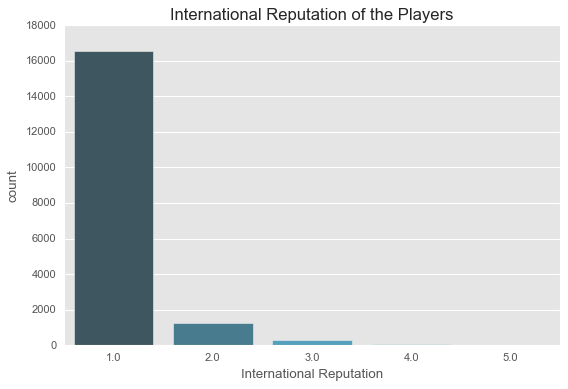

In [407]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.style.use('ggplot')
sns.countplot(fifa_data['International Reputation'], palette = 'GnBu_d')
plt.title('International Reputation of the Players', fontsize = 15)
plt.xlabel('International Reputation', fontsize = 12)
plt.show()

In [396]:
count_df = pd.DataFrame(fifa_data.groupby(['Nationality'])['ID'].count().reset_index())
fig = go.Figure(data=go.Choropleth(
    locations=count_df['Nationality'], # Spatial coordinates
    z = count_df['ID'].astype(float), # Data to be color-coded
    locationmode = 'country names', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Number of players",
))
layout = go.Layout(title = 'Count of Players by Region')
fig.update_layout(
    title_text = 'Count of Players by Region'
)
fig.show()

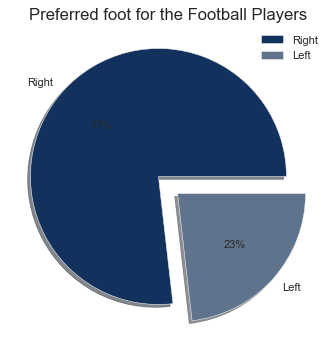

In [414]:
labels = ['Right', 'Left']
sizes = fifa_data['Preferred Foot'].value_counts()
colors =['#12325D', '#60738D'] 
explode = [0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 5)
plt.pie(sizes, labels = labels, autopct='%1.0f%%',colors = colors, explode = explode, shadow = True)
plt.title('Preferred foot for the Football Players', fontsize = 15)
plt.legend()
plt.show()

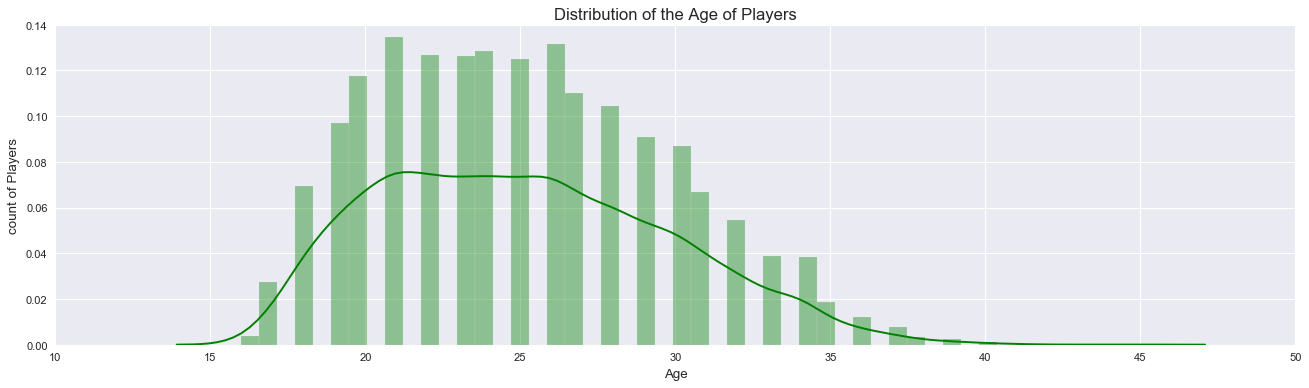

In [249]:
plt.figure(figsize = (20, 5))
plt.style.use('seaborn')
sns.distplot(fifa_data['Age'], color = 'g')
plt.title('Distribution of the Age of Players', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('count of Players', fontsize = 12)
plt.show()

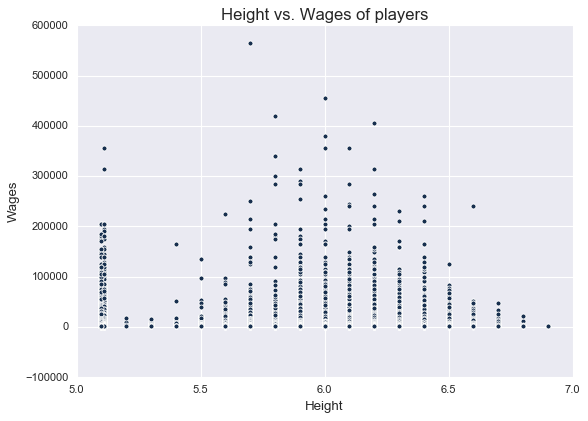

In [415]:
# fifa_data.fillna(0, inplace = True)
plt.style.use('seaborn')
sns.scatterplot(fifa_data['Height'], fifa_data['Wage'], color = '#172F4E')
plt.title('Height vs. Wages of players', fontsize = 15)
plt.xlabel('Height', fontsize = 12)
plt.ylabel('Wages', fontsize = 12)
plt.show()

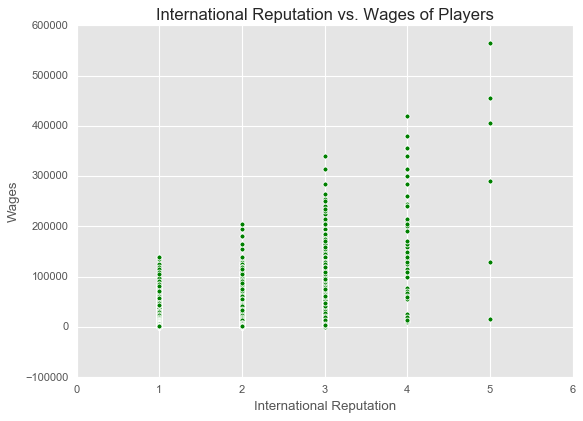

In [403]:
plt.style.use('ggplot')
sns.scatterplot(fifa_data['International Reputation'], fifa_data['Wage'], color = 'Green')
plt.title('International Reputation vs. Wages of Players', fontsize = 15)
plt.xlabel('International Reputation', fontsize = 12)
plt.ylabel('Wages', fontsize = 12)
plt.show()

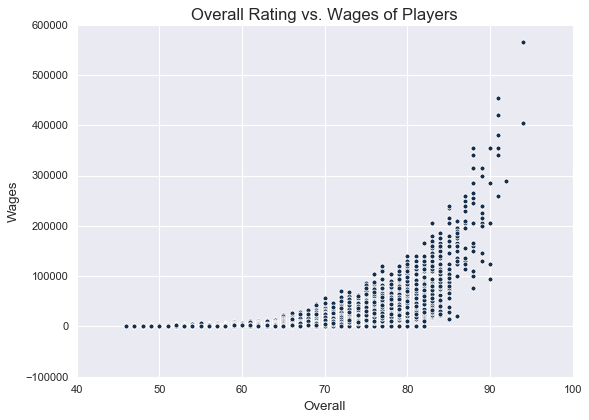

In [417]:
plt.style.use('seaborn')
sns.scatterplot(fifa_data['Overall'], fifa_data['Wage'], color = '#172F4E')
plt.title('Overall Rating vs. Wages of Players', fontsize = 15)
plt.xlabel('Overall', fontsize = 12)
plt.ylabel('Wages', fontsize = 12)
plt.show()

No handles with labels found to put in legend.


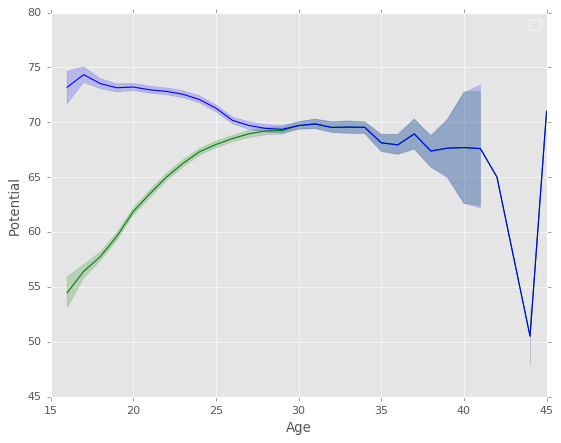

In [361]:
plt.style.use('ggplot')
labels = ['Overall', 'Potential']
sns.lineplot(fifa_data['Age'], fifa_data['Overall'],  color = 'Green')
sns.lineplot(fifa_data['Age'], fifa_data['Potential'],  color = 'Blue')
plt.legend()

In [ ]:
sns.pairplot(iris, kind="reg") #for regression

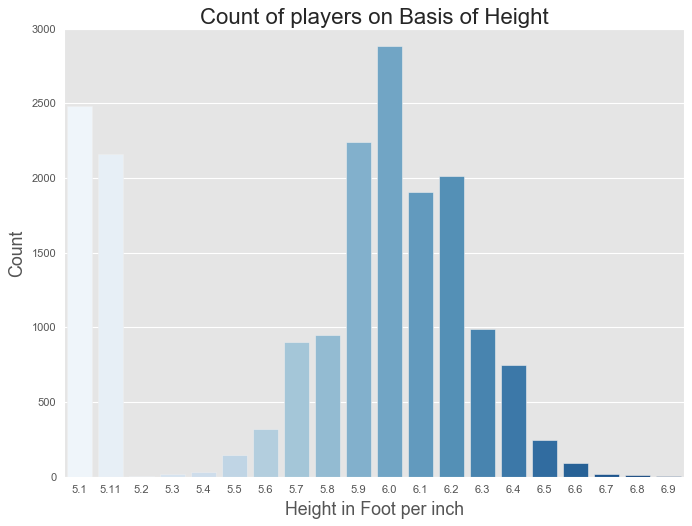

In [418]:
plt.figure(figsize = (10, 7))
plt.style.use('ggplot')
ax = sns.countplot(x = 'Height', data = fifa_data, palette = 'Blues')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

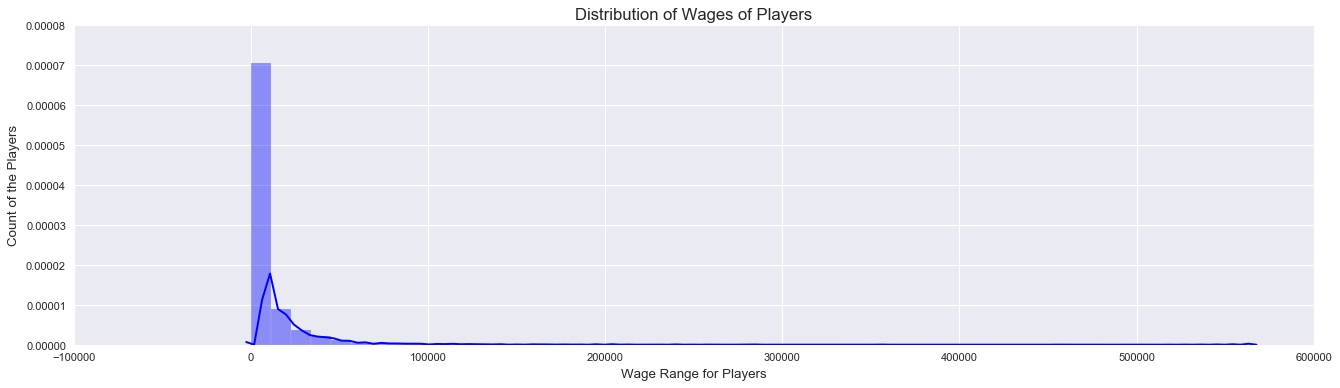

In [248]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (20, 5))
sns.distplot(fifa_data['Wage'], color = 'blue')
plt.xlabel('Wage Range for Players', fontsize = 12)
plt.ylabel('Count of the Players', fontsize = 12)
plt.title('Distribution of Wages of Players', fontsize = 15)
plt.show()


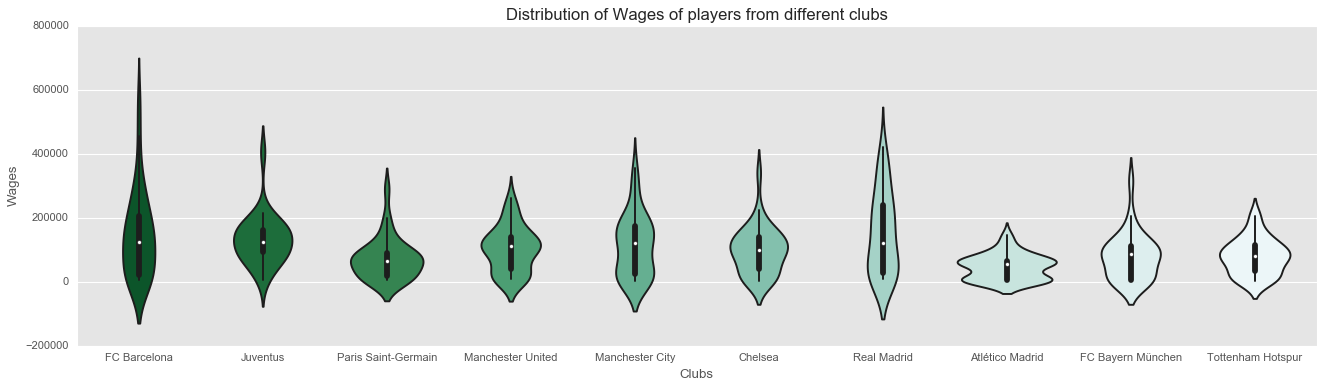

In [408]:
# #Highest paying clubs
# clubs_df = pd.DataFrame(fifa_data.groupby(['Club'])['Wage'].mean().reset_index())
# clubs_df
# clubs = clubs_df.Club[:10]
# wages_per_club = fifa_data.loc[fifa_data['Club'].isin(clubs) & fifa_data['Wage']]

# plt.figure(figsize = (20, 5))
# ax = sns.violinplot(x = wages_per_club['Club'], y = wages_per_club['Wage'], palette = 'BuGn_r')
# ax.set_xlabel(xlabel = 'Clubs', fontsize = 12)
# ax.set_ylabel(ylabel = 'Wages', fontsize = 12)
# ax.set_title(label = 'Distribution of Wages of players from different clubs', fontsize = 15)
# plt.show()

clubs = fifa_data.Club.unique()[:10]
wages_per_club = fifa_data.loc[fifa_data['Club'].isin(clubs) & fifa_data['Wage']]

plt.figure(figsize = (20, 5))
ax = sns.violinplot(x = wages_per_club['Club'], y = wages_per_club['Wage'], palette = 'BuGn_r')
ax.set_xlabel(xlabel = 'Clubs', fontsize = 12)
ax.set_ylabel(ylabel = 'Wages', fontsize = 12)
ax.set_title(label = 'Distribution of Wages of players from different clubs', fontsize = 15)
plt.show()


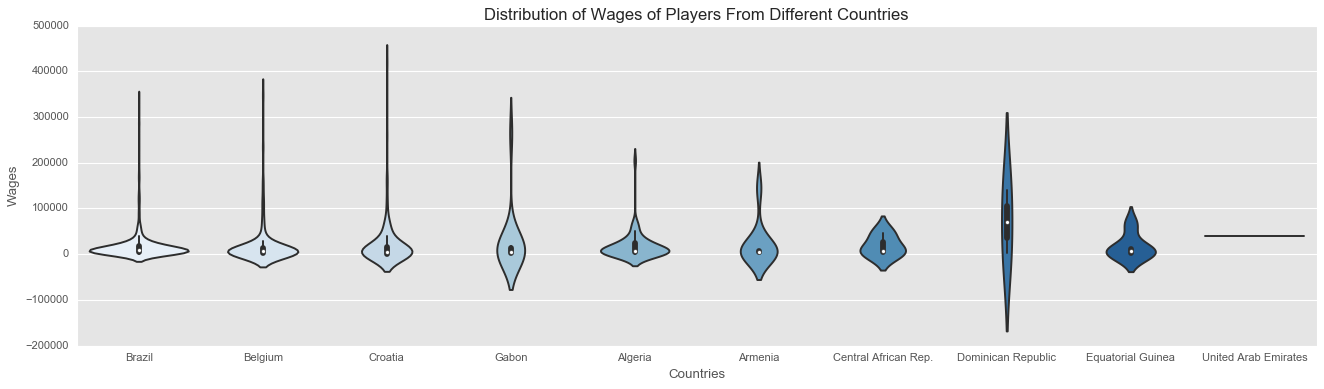

In [436]:
#Highest paying clubs
# country_df = pd.DataFrame(fifa_data.groupby(['Nationality'])['Wage'].mean().reset_index())
# countries = country_df.sort_values(by = ['Wage'], ascending=False)[:10]

#wages_per_country = fifa_data.loc[fifa_data['Nationality'].isin(countries.Nationality) & fifa_data['Wage']]

plt.figure(figsize = (20, 5))
ax = sns.violinplot(x = wages_per_country['Nationality'], y = wages_per_country['Wage'], palette = 'Blues')
ax.set_xlabel(xlabel = 'Countries', fontsize = 12)
ax.set_ylabel(ylabel = 'Wages', fontsize = 12)
ax.set_title(label = 'Distribution of Wages of Players From Different Countries', fontsize = 15)
plt.show()


Text(0, 0.5, 'Wage')

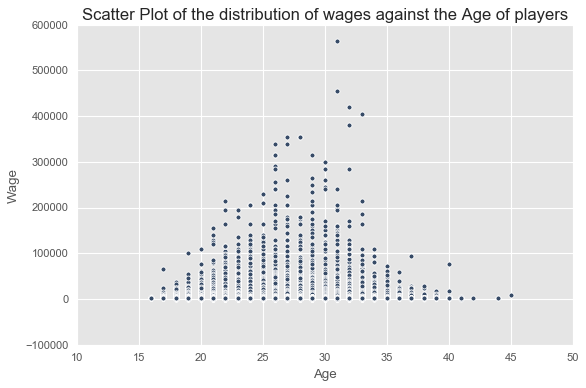

In [413]:
plt.style.use('ggplot')
ax = sns.scatterplot(fifa_data['Age'], fifa_data['Wage'], color = '#374B67')
ax.set_title(label = 'Scatter Plot of the distribution of wages against the Age of players', fontsize = 15)
ax.set_xlabel(xlabel = 'Age', fontsize = 12)
ax.set_ylabel(ylabel = 'Wage', fontsize = 12)

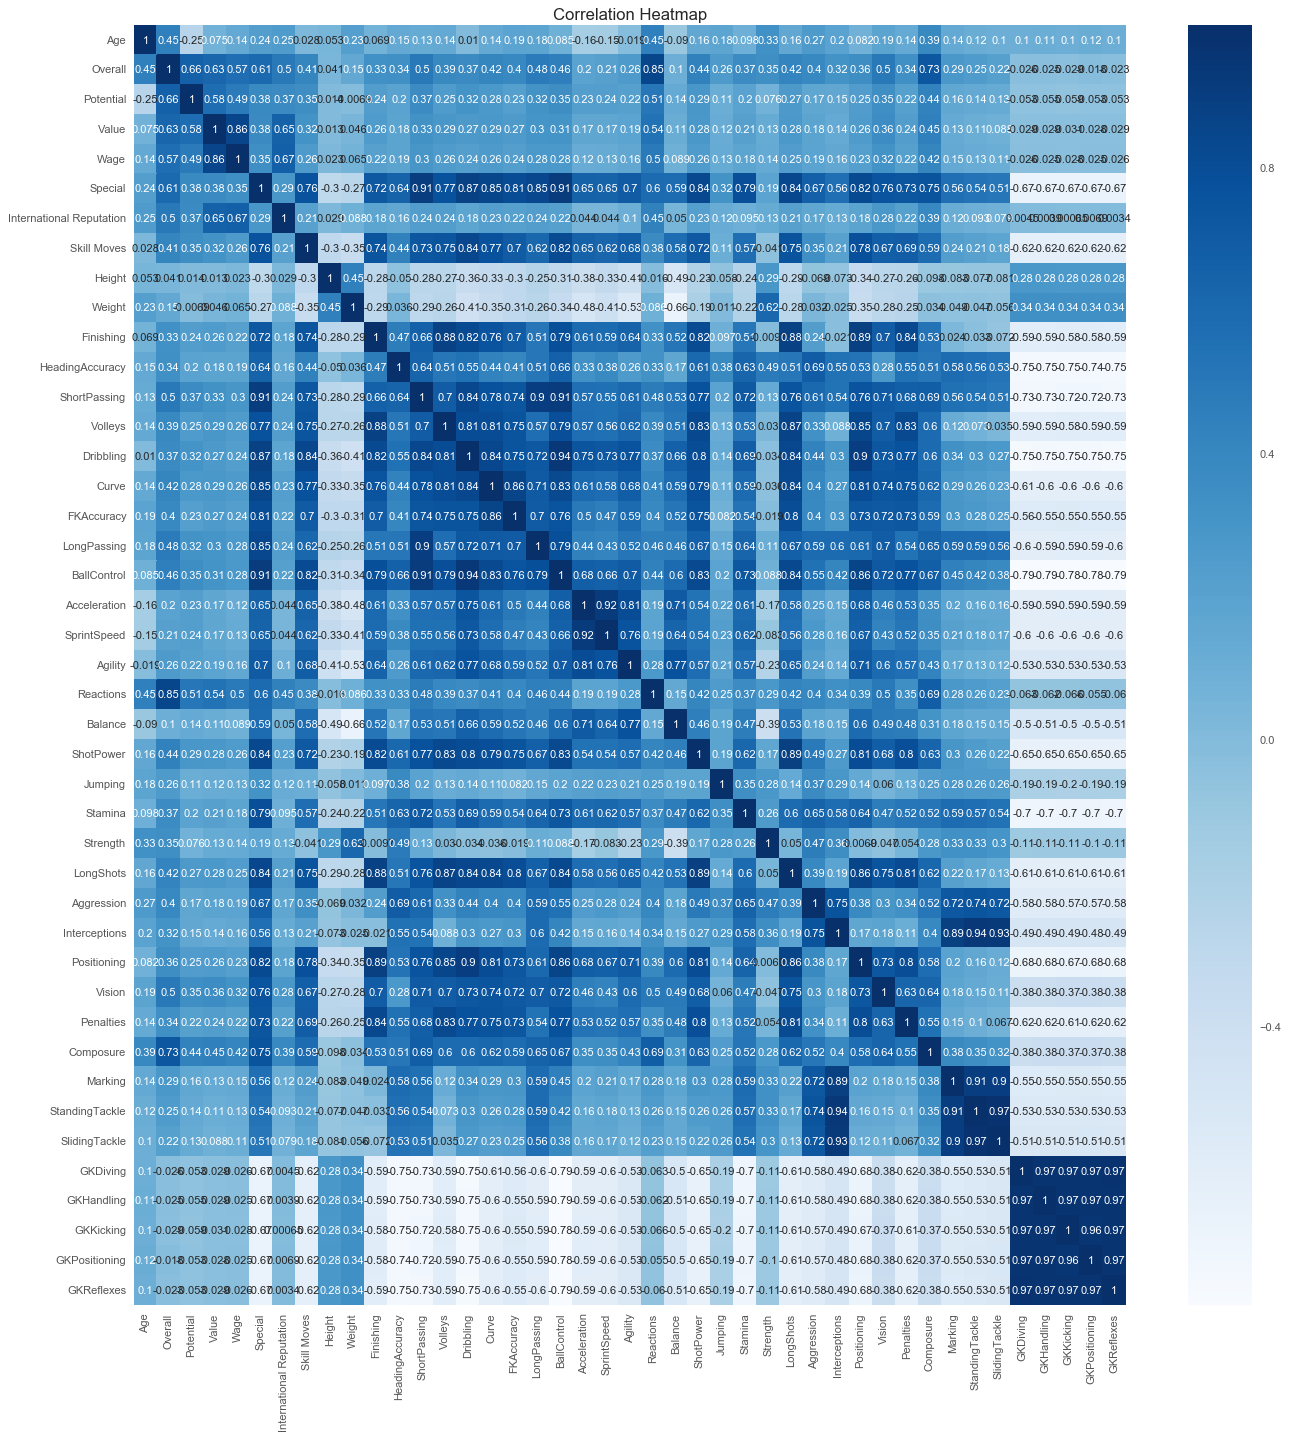

In [410]:
plt.figure(figsize = (20, 20))
sns.heatmap(fifa_data[['Age', 'Overall', 'Potential', 'Value',
                    'Wage', 'Special', 'International Reputation',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].corr(), annot = True, cmap = "Blues")

plt.title('Correlation Heatmap', fontsize = 15)
plt.show()

In [184]:
print(plt.style.available)


['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']
